Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
air = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [7]:
air.shape

(3999, 12)

## Data preprocessing

In [8]:
air=air.iloc[:,1:]

In [9]:
air.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
air=air.drop(columns='Qual_miles')

In [12]:
air.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [13]:
air.isnull().sum()

Balance              0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [14]:
air.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [15]:
air.shape

(3999, 10)

In [16]:
#data normalization

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
df_norm = norm_func(air.iloc[:,:])

In [18]:
df_norm.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [19]:
airdend=df_norm.drop(columns='Days_since_enroll')

In [20]:
airdend.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.0
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.0
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.0
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.0
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,1.0


In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
df_norm1 = norm_func(airdend.iloc[:,:])

In [23]:
df_norm1.shape

(3999, 9)

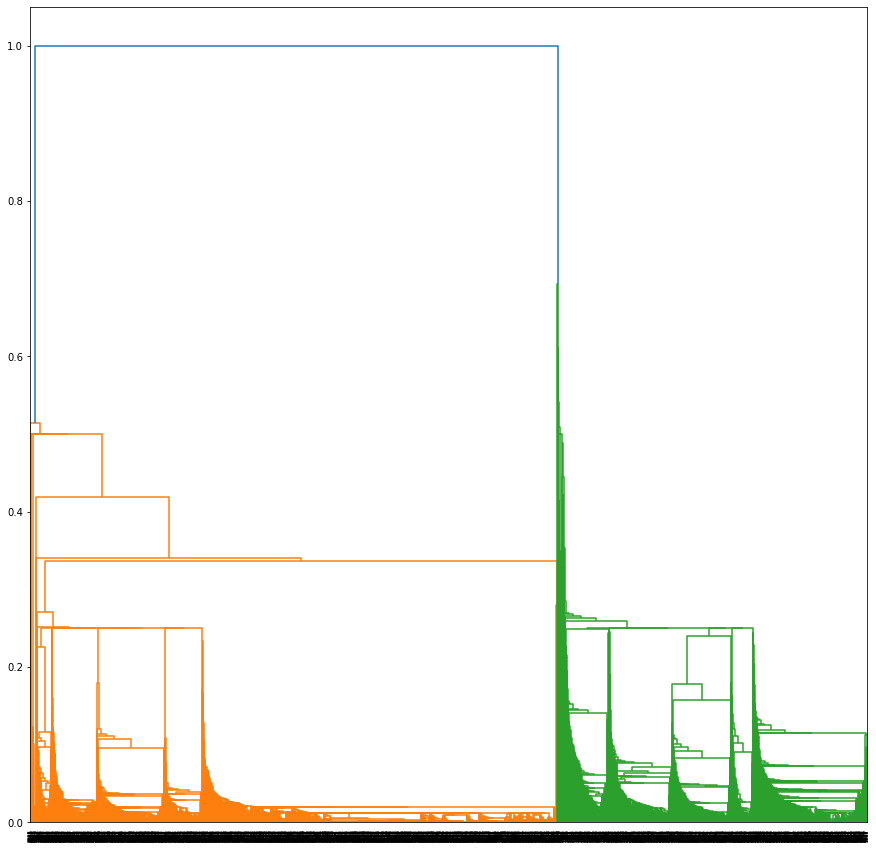

In [24]:
# create dendrogram
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(df_norm1,method='single'))

In [25]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [26]:
# save clusters for chart
y_hc = hc.fit_predict(air)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [27]:
df_norm1['Cluster']=Clusters

In [28]:
df_norm1

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Award?,Cluster
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.0,0
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.0,0
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.0,0
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.0,0
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,1.0,0
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,1.0,0
3995,0.037766,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,1.0,0
3996,0.043169,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,1.0,0
3997,0.032202,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.0,0


## Clustering using K means

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [30]:
km=df_norm.iloc[:,0:]

In [31]:
km.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


##### How to find optimum number of cluster?
#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

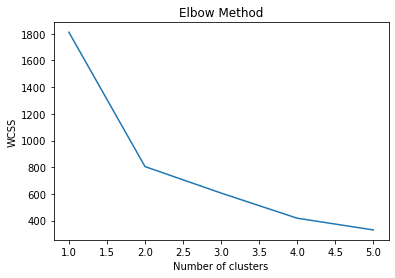

In [32]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(km)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(km)

KMeans(n_clusters=4, random_state=42)

In [34]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [35]:
#Assign clusters to the data set
km['clusterid_new'] = clusters_new.labels_

<ipython-input-35-833e89a4b17f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  km['clusterid_new'] = clusters_new.labels_


In [36]:
km

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,0.016508,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [37]:
km.sort_values(by=["clusterid_new"])

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,0.016508,0.0,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
2421,0.024086,0.0,0.5,0.0,0.031382,0.127907,0.000000,0.000000,0.404389,0.0,0
2424,0.008409,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.403545,0.0,0
2426,0.071203,0.0,0.0,0.0,0.032235,0.046512,0.000000,0.000000,0.402701,0.0,0
2429,0.039894,0.0,0.0,0.0,0.000937,0.034884,0.000000,0.000000,0.402701,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3382,0.023453,0.5,0.0,0.0,0.151632,0.127907,0.000000,0.000000,0.188932,0.0,3
2268,0.054287,0.5,0.0,0.0,0.052165,0.151163,0.016225,0.018868,0.469375,0.0,3
3384,0.040097,0.5,0.0,0.0,0.059931,0.197674,0.000000,0.000000,0.155655,0.0,3
2283,0.075348,1.0,0.0,0.5,0.265942,0.325581,0.000000,0.000000,0.453581,0.0,3


In [38]:
km.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.023901,0.023195,0.008962,0.001054,0.012648,0.075450,0.007353,0.012433,0.436112,0.0
1,1,0.048995,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
2,2,0.063535,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
3,3,0.069234,0.644122,0.000805,0.005636,0.118637,0.200595,0.007313,0.011941,0.534640,0.0


In [39]:
plot=km.groupby('clusterid_new').agg(['mean']).reset_index()

In [40]:
plot

,clusterid_new,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.023901,0.023195,0.008962,0.001054,0.012648,0.075450,0.007353,0.012433,0.436112,0.0
1,1,0.048995,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
2,2,0.063535,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
3,3,0.069234,0.644122,0.000805,0.005636,0.118637,0.200595,0.007313,0.011941,0.534640,0.0


In [41]:
list(enumerate(km.columns))

[(0, 'Balance'),
 (1, 'cc1_miles'),
 (2, 'cc2_miles'),
 (3, 'cc3_miles'),
 (4, 'Bonus_miles'),
 (5, 'Bonus_trans'),
 (6, 'Flight_miles_12mo'),
 (7, 'Flight_trans_12'),
 (8, 'Days_since_enroll'),
 (9, 'Award?'),
 (10, 'clusterid_new')]

## DBscan clustering

In [42]:
db=air

In [43]:
db.head(5)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [44]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
dbscan = DBSCAN(eps=20, min_samples=50)
dbscan.fit(db)

DBSCAN(eps=20, min_samples=50)

In [52]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [53]:
db['dbcluster']=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [54]:
db.head

<bound method NDFrame.head of       Balance  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
0       28143          1          1          1          174            1   
1       19244          1          1          1          215            2   
2       41354          1          1          1         4123            4   
3       14776          1          1          1          500            1   
4       97752          4          1          1        43300           26   
...       ...        ...        ...        ...          ...          ...   
3994    18476          1          1          1         8525            4   
3995    64385          1          1          1          981            5   
3996    73597          3          1          1        25447            8   
3997    54899          1          1          1          500            1   
3998     3016          1          1          1            0            0   

      Flight_miles_12mo  Flight_trans_12  Days_since_enro

## Comparison of Hierarchical, kmeans and dbscan clustering techniques

In [55]:
air.shape

(3999, 11)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

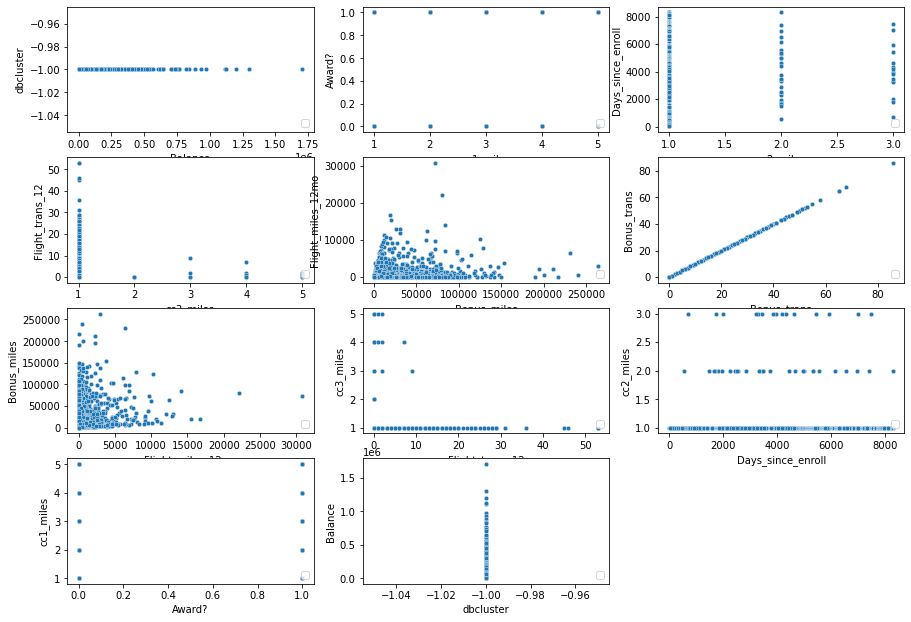

In [56]:
plt.figure(figsize=(15,30))
n=0
m=10  
for i in enumerate(air.columns):
        
    plt.subplot(11,3,i[0]+1)
    cr=air.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue=None, 
    data=air, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

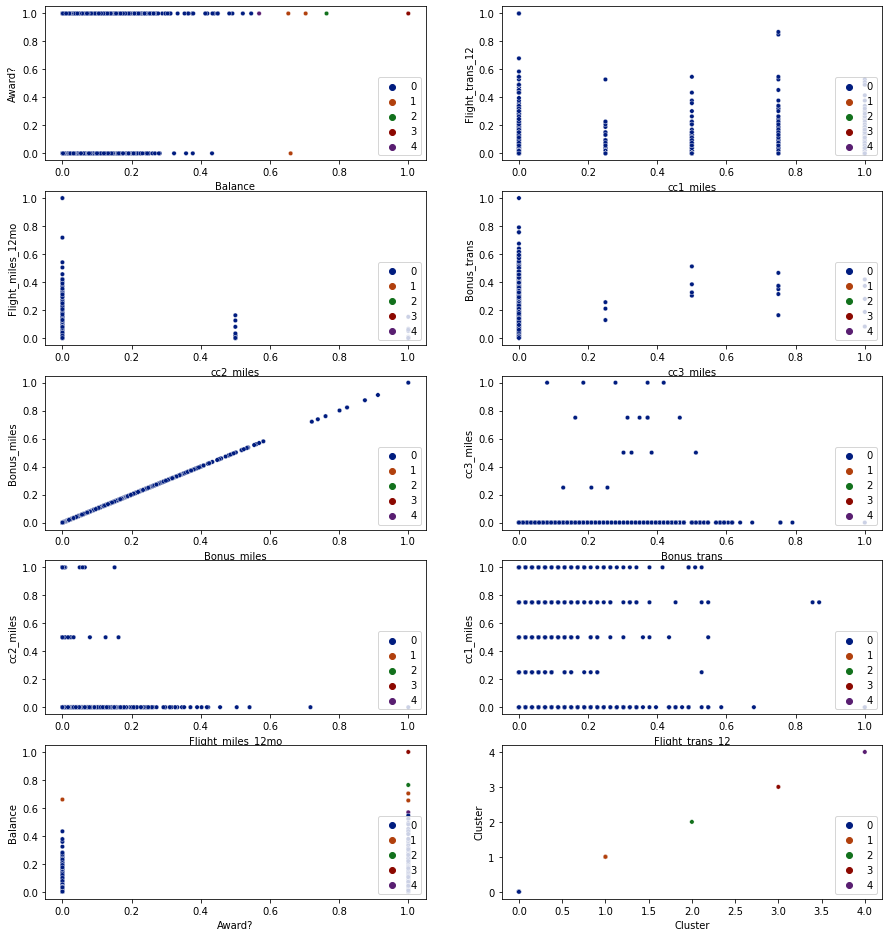

In [57]:
plt.figure(figsize=(15,30))
n=0
m=8 
for i in enumerate(df_norm1.columns):
        
    plt.subplot(9,2,i[0]+1)
    cr=df_norm1.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="Cluster", 
    data=df_norm1, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

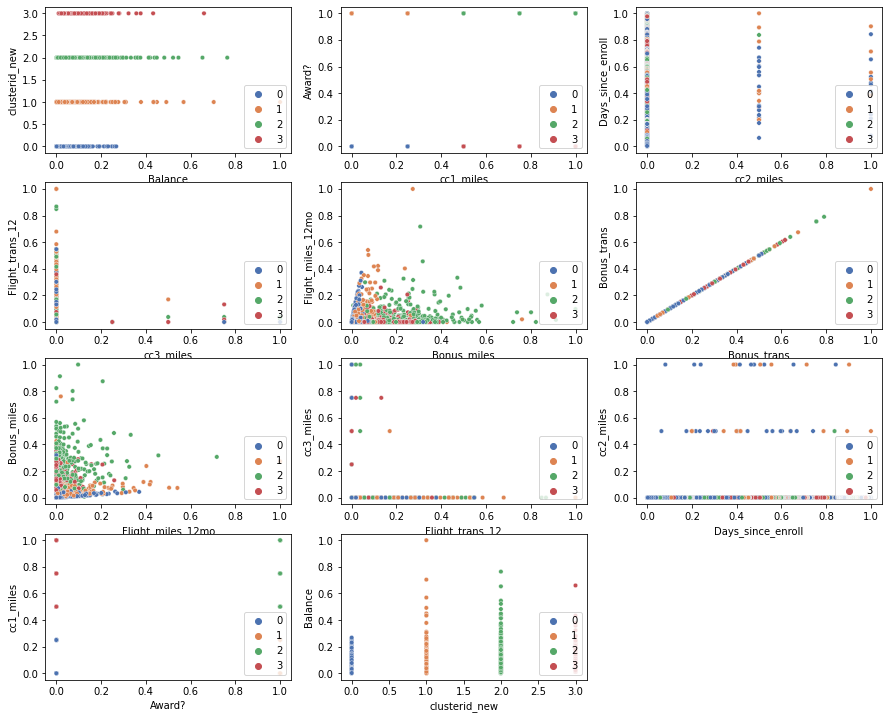

In [58]:
plt.figure(figsize=(15,35))
n=0
m=10 
for i in enumerate(km.columns):
        
    plt.subplot(11,3,i[0]+1)
    cr=km.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="clusterid_new", 
    data=km, palette='deep', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

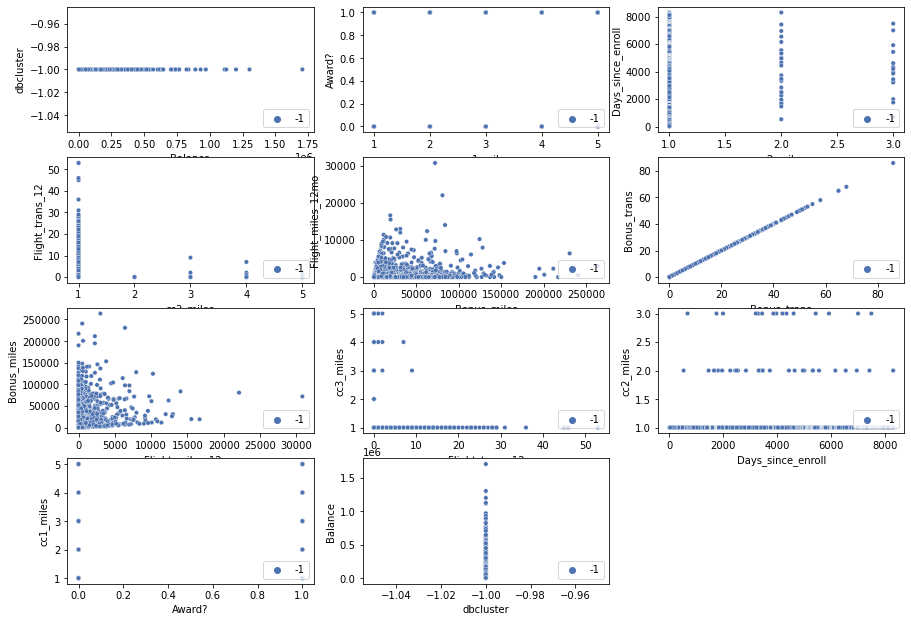

In [59]:
plt.figure(figsize=(15,30))
n=0
m=10 
for i in enumerate(db.columns):
        
    plt.subplot(11,3,i[0]+1)
    cr=db.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="dbcluster", 
    data=db, palette='deep', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1